# Funciones comunes para descarga de tickes
*tickes = valores de acciones*

In [ ]:
import yfinance as yf
import pandas as pd
import time
import sys
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional
#
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, mean_absolute_error
#
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


def descargar_datos(
    tickers: str,
    start_date: str = '2001-01-01',
    end_date: Optional[str] = None,
    interval: str = '1d'
) -> Optional[pd.DataFrame]:
    """
    Descarga datos históricos de Yahoo Finance para múltiples tickers.

    Args:
        tickers (str): Símbolos de los activos separados por ':' (por ejemplo, 'AAPL:GOOGL:MSFT').
        start_date (str): Fecha de inicio en formato 'YYYY-MM-DD'. Default es '2001-01-01'.
        end_date (Optional[str]): Fecha de fin en formato 'YYYY-MM-DD'. Si no se especifica, se usa la fecha actual.
        interval (str): Intervalo de tiempo para los datos (por ejemplo, '1d' para diario).

    Returns:
        Optional[pd.DataFrame]: DataFrame con fechas como índice, una columna "día" con contador secuencial,
                               y columnas de precios de cierre para cada ticker, o None si no se pudo descargar ningún ticker.
    """
    if end_date is None:
        end_date = pd.to_datetime('today').strftime('%Y-%m-%d')

    # Split de los tickers
    ticker_list = [ticker.strip() for ticker in tickers.split(':') if ticker.strip()]

    if not ticker_list:
        print("No se proporcionaron tickers válidos.")
        return None

    print(f"Descargando datos para {len(ticker_list)} tickers desde {start_date} hasta {end_date}...")
    print(f"Tickers: {', '.join(ticker_list)}")
    sys.stdout.flush()

    # DataFrame para combinar todos los datos
    combined_df = pd.DataFrame()
    successful_downloads = 0



    for ticker in ticker_list:
        print(f"\nProcesando {ticker}...")
        sys.stdout.flush()

        try:
            # Descargar datos para el ticker actual
            data = yf.download(ticker, start=start_date, end=end_date, interval=interval)

            if data.empty:
                print(f"❌ No se encontraron datos para {ticker} en el período especificado.")
                continue

            # Extraer solo la columna Close
            close_data = data['Close'].copy()

            # Asegurar que sea una Serie y tenga el nombre correcto
            if isinstance(close_data, pd.DataFrame):
                close_data = close_data.iloc[:, 0]  # Tomar la primera columna si es DataFrame
            close_data.name = ticker

            # Combinar con el DataFrame principal usando outer join
            if combined_df.empty:
                combined_df = pd.DataFrame(close_data)
            else:
                combined_df = combined_df.join(close_data, how='outer')

            successful_downloads += 1
            print(f"✅ Datos descargados exitosamente para {ticker}.")
            print(f"   Fecha de inicio real: {data.index.min().strftime('%Y-%m-%d')}")
            print(f"   Fecha de fin real: {data.index.max().strftime('%Y-%m-%d')}")

            time.sleep(1)  # Espera para evitar sobrecarga de la API

        except Exception as e:
            print(f"❌ Error al descargar datos para {ticker}: {e}")
            continue

    # Resultado final
    if successful_downloads == 0:
        print(f"\n❌ No se pudo descargar datos para ninguno de los tickers proporcionados.")
        return None

    # Agregar columna "día" como primera columna
    #combined_df.insert(0, 'día', range(1, len(combined_df) + 1))

    print(f"\n✅ Descarga completada exitosamente.")
    print(f"   Tickers procesados: {successful_downloads}/{len(ticker_list)}")
    print(f"   Columnas en el DataFrame final: {list(combined_df.columns)}")
    print(f"   Rango de fechas: {combined_df.index.min().strftime('%Y-%m-%d')} a {combined_df.index.max().strftime('%Y-%m-%d')}")
    print(f"   Total de filas: {len(combined_df)}")

    return combined_df

## Obteniendo los datos desde yahoo finance

In [ ]:
activos = descargar_datos(
          tickers="ARS=X:YPFD.BA:GGAL.BA:PAMP.BA:TGSU2.BA:EDN.BA:COME.BA:ALUA.BA:TECO2.BA"
        , start_date="2023-02-01"
        , end_date="2025-05-31"
    )

Descargando datos para 9 tickers desde 2023-02-01 hasta 2025-05-31...
Tickers: ARS=X, YPFD.BA, GGAL.BA, PAMP.BA, TGSU2.BA, EDN.BA, COME.BA, ALUA.BA, TECO2.BA

Procesando ARS=X...


[*********************100%***********************]  1 of 1 completed

✅ Datos descargados exitosamente para ARS=X.
   Fecha de inicio real: 2023-02-01
   Fecha de fin real: 2025-05-30



Procesando YPFD.BA...


[*********************100%***********************]  1 of 1 completed

✅ Datos descargados exitosamente para YPFD.BA.
   Fecha de inicio real: 2023-02-01
   Fecha de fin real: 2025-05-30



Procesando GGAL.BA...


[*********************100%***********************]  1 of 1 completed

✅ Datos descargados exitosamente para GGAL.BA.
   Fecha de inicio real: 2023-02-01
   Fecha de fin real: 2025-05-30



Procesando PAMP.BA...


[*********************100%***********************]  1 of 1 completed

✅ Datos descargados exitosamente para PAMP.BA.
   Fecha de inicio real: 2023-02-01
   Fecha de fin real: 2025-05-30



Procesando TGSU2.BA...


[*********************100%***********************]  1 of 1 completed

✅ Datos descargados exitosamente para TGSU2.BA.
   Fecha de inicio real: 2023-02-01
   Fecha de fin real: 2025-05-30



Procesando EDN.BA...


[*********************100%***********************]  1 of 1 completed

✅ Datos descargados exitosamente para EDN.BA.
   Fecha de inicio real: 2023-02-01
   Fecha de fin real: 2025-05-30



Procesando COME.BA...


[*********************100%***********************]  1 of 1 completed

✅ Datos descargados exitosamente para COME.BA.
   Fecha de inicio real: 2023-02-01
   Fecha de fin real: 2025-05-30



Procesando ALUA.BA...


[*********************100%***********************]  1 of 1 completed

✅ Datos descargados exitosamente para ALUA.BA.
   Fecha de inicio real: 2023-02-01
   Fecha de fin real: 2025-05-30



Procesando TECO2.BA...


[*********************100%***********************]  1 of 1 completed

✅ Datos descargados exitosamente para TECO2.BA.
   Fecha de inicio real: 2023-02-01
   Fecha de fin real: 2025-05-30



✅ Descarga completada exitosamente.
   Tickers procesados: 9/9
   Columnas en el DataFrame final: ['ARS=X', 'YPFD.BA', 'GGAL.BA', 'PAMP.BA', 'TGSU2.BA', 'EDN.BA', 'COME.BA', 'ALUA.BA', 'TECO2.BA']
   Rango de fechas: 2023-02-01 a 2025-05-30
   Total de filas: 606


In [ ]:
#activos

## Valor cierre de las acciones expresadas en dolares

In [ ]:
## preparación de los datos
## 1. trabajamos en  una copia llamada activos dolarizados
## 2. Eliminación de NaN
## 3. Se crea una secuencia


activos_dolarizados = activos.copy()

activos_dolarizados['YPFD_USD'] = activos_dolarizados['YPFD.BA'] / activos_dolarizados['ARS=X']
activos_dolarizados['GGAL_USD'] = activos_dolarizados['GGAL.BA'] / activos_dolarizados['ARS=X']
activos_dolarizados['PAMP_USD'] = activos_dolarizados['PAMP.BA'] / activos_dolarizados['ARS=X']
activos_dolarizados['TGSU2_USD']= activos_dolarizados['TGSU2.BA'] / activos_dolarizados['ARS=X']
activos_dolarizados['EDN_USD']  = activos_dolarizados['EDN.BA'] / activos_dolarizados['ARS=X']
activos_dolarizados['COME_USD'] = activos_dolarizados['COME.BA'] / activos_dolarizados['ARS=X']
activos_dolarizados['ALUA_USD'] = activos_dolarizados['ALUA.BA'] / activos_dolarizados['ARS=X']
activos_dolarizados['TECO_USD'] = activos_dolarizados['TECO2.BA'] / activos_dolarizados['ARS=X']


#limpio los datos
activos_dolarizados = activos_dolarizados.dropna(how='any')

activos_dolarizados.insert(0, 'D', range(1, len(activos_dolarizados) + 1))


In [ ]:
activos_dolarizados

,D,ARS=X,YPFD.BA,GGAL.BA,PAMP.BA,TGSU2.BA,EDN.BA,COME.BA,ALUA.BA,TECO2.BA,YPFD_USD,GGAL_USD,PAMP_USD,TGSU2_USD,EDN_USD,COME_USD,ALUA_USD,TECO_USD
Date,,,,,,,,,,,,,,,,,,
2023-02-01,1,186.994431,4287.0,436.327087,498.700012,777.850281,169.00,20.462460,206.138840,471.500000,22.925816,2.333369,2.666924,4.159751,0.903770,0.109428,1.102380,2.521465
2023-02-02,2,187.251495,4130.0,436.327087,491.500000,771.136414,164.00,20.799488,205.161880,459.149994,22.055899,2.330166,2.624812,4.118186,0.875827,0.111078,1.095649,2.452050
2023-02-03,3,187.579483,4119.0,413.601685,475.500000,739.485291,159.75,20.414314,205.894592,427.000000,21.958692,2.204941,2.534925,3.942250,0.851639,0.108830,1.097639,2.276368
2023-02-06,4,188.099060,4165.0,414.965240,478.399994,742.362671,161.00,20.414314,202.231003,427.399994,22.142588,2.206099,2.543341,3.946658,0.855932,0.108530,1.075130,2.272207
2023-02-07,5,189.114594,4235.0,422.691833,480.700012,767.683594,163.00,20.799488,202.475235,436.500000,22.393830,2.235110,2.541845,4.059357,0.861911,0.109984,1.070648,2.308124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-26,561,1133.852173,43150.0,7330.000000,3815.000000,6982.429199,2145.00,167.500000,808.000000,2440.000000,38.056107,6.464688,3.364636,6.158148,1.891781,0.147726,0.712615,2.151956
2025-05-27,562,1143.489990,43100.0,7220.000000,3810.000000,6924.881348,2100.00,171.000000,817.000000,2430.000000,37.691629,6.314004,3.331905,6.055918,1.836483,0.149542,0.714479,2.125073
2025-05-28,563,1156.496094,43600.0,7130.000000,3830.000000,6934.472656,2100.00,166.750000,830.000000,2430.000000,37.700084,6.165174,3.311728,5.996106,1.815830,0.144186,0.717685,2.101174


In [ ]:
activos_dolarizados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 565 entries, 2023-02-01 to 2025-05-30
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   D          565 non-null    int64  
 1   ARS=X      565 non-null    float64
 2   YPFD.BA    565 non-null    float64
 3   GGAL.BA    565 non-null    float64
 4   PAMP.BA    565 non-null    float64
 5   TGSU2.BA   565 non-null    float64
 6   EDN.BA     565 non-null    float64
 7   COME.BA    565 non-null    float64
 8   ALUA.BA    565 non-null    float64
 9   TECO2.BA   565 non-null    float64
 10  YPFD_USD   565 non-null    float64
 11  GGAL_USD   565 non-null    float64
 12  PAMP_USD   565 non-null    float64
 13  TGSU2_USD  565 non-null    float64
 14  EDN_USD    565 non-null    float64
 15  COME_USD   565 non-null    float64
 16  ALUA_USD   565 non-null    float64
 17  TECO_USD   565 non-null    float64
dtypes: float64(17), int64(1)
memory usage: 83.9 KB


##Reestructuramos a formato tidy
Para luego hacer un análisis dinámico por acción y fecha.

In [ ]:
# Trabajamos en una copia llamada df_modelo
df_modelo = activos_dolarizados.copy()

# Reseteamos el índice para que la fecha esté como columna
df_modelo = df_modelo.reset_index()

# Filtramos solo las columnas en USD + Fecha + D
columnas_usd = [col for col in df_modelo.columns if col.endswith('_USD')]
columnas_utiles = ['Date', 'D'] + columnas_usd
df_usd = df_modelo[columnas_utiles]

# Transformamos a formato long
df_modelo_long = pd.melt(df_usd,
                  id_vars=['Date', 'D'],
                  var_name='activo',
                  value_name='close_usd')

# Renombramos 'activo' por 'ticker' (justo después del melt)
df_modelo_long = df_modelo_long.rename(columns={'activo': 'Ticker'})

df_modelo_long.head()

,Date,D,Ticker,close_usd
0,2023-02-01,1,YPFD_USD,22.925816
1,2023-02-02,2,YPFD_USD,22.055899
2,2023-02-03,3,YPFD_USD,21.958692
3,2023-02-06,4,YPFD_USD,22.142588
4,2023-02-07,5,YPFD_USD,22.393830


##Calculamos métricas financieras

In [ ]:
# Calculamos métricas financieras

# Retorno diario porcentual por acción
df_modelo_long['Return'] = df_modelo_long.groupby('Ticker')['close_usd'].pct_change()

# Volatilidad (desviación estándar de los retornos) en ventana móvil de 21 días por acción
df_modelo_long['Volatility'] = df_modelo_long.groupby('Ticker')['Return'].rolling(window=21).std().reset_index(level=0, drop=True)

# Momentum (variación porcentual del precio con respecto a 21 días atras) por acción
df_modelo_long['Momentum'] = df_modelo_long.groupby('Ticker')['close_usd'].pct_change(periods=21)

In [ ]:
df_modelo_long.head()

,Date,D,Ticker,close_usd,Return,Volatility,Momentum
0,2023-02-01,1,YPFD_USD,22.925816,NaN,NaN,NaN
1,2023-02-02,2,YPFD_USD,22.055899,-0.037945,NaN,NaN
2,2023-02-03,3,YPFD_USD,21.958692,-0.004407,NaN,NaN
3,2023-02-06,4,YPFD_USD,22.142588,0.008375,NaN,NaN
4,2023-02-07,5,YPFD_USD,22.393830,0.011347,NaN,NaN


In [ ]:
# Observamos cantidad y porcentaje de NaN por columna en las métricas: Return - Volatility - Momentum

total_filas = len(df_modelo_long)
nans = df_modelo_long[['Return','Volatility','Momentum']].isna().sum()
porcentajes = (nans / total_filas) * 100

#Mostramos valores
for col in nans.index:
    print(f"{col}: {nans[col]} Nan, {porcentajes[col]:.3f}% del total")

Return: 8 Nan, 0.177% del total
Volatility: 168 Nan, 3.717% del total
Momentum: 168 Nan, 3.717% del total


In [ ]:
#Al ser un porcentaje muy bajo <5% , eliminamos los NaN
df_modelo_long = df_modelo_long.dropna(subset=['Return', 'Volatility', 'Momentum'])

df_modelo_long.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4352 entries, 21 to 4519
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        4352 non-null   datetime64[ns]
 1   D           4352 non-null   int64         
 2   Ticker      4352 non-null   object        
 3   close_usd   4352 non-null   float64       
 4   Return      4352 non-null   float64       
 5   Volatility  4352 non-null   float64       
 6   Momentum    4352 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 272.0+ KB


In [ ]:
# Verificamos si hay duplicados
df_modelo_long.duplicated().sum()

np.int64(0)

##Estadisticas Descriptivas

In [ ]:
cols_numericas = ['close_usd', 'Return', 'Volatility', 'Momentum']
df_modelo_long[cols_numericas].describe()

,close_usd,Return,Volatility,Momentum
count,4352.000000,4352.000000,4352.000000,4352.000000
mean,6.114445,0.001792,0.039979,0.032629
std,10.031668,0.046122,0.023269,0.204436
min,0.082924,-0.569557,0.011079,-0.646026
25%,1.220612,-0.020541,0.028055,-0.083515
50%,2.541497,0.000783,0.034321,0.025280
75%,4.777880,0.024461,0.041793,0.145617
max,53.491951,0.422835,0.167166,1.204967


##Exploración de variables númericas

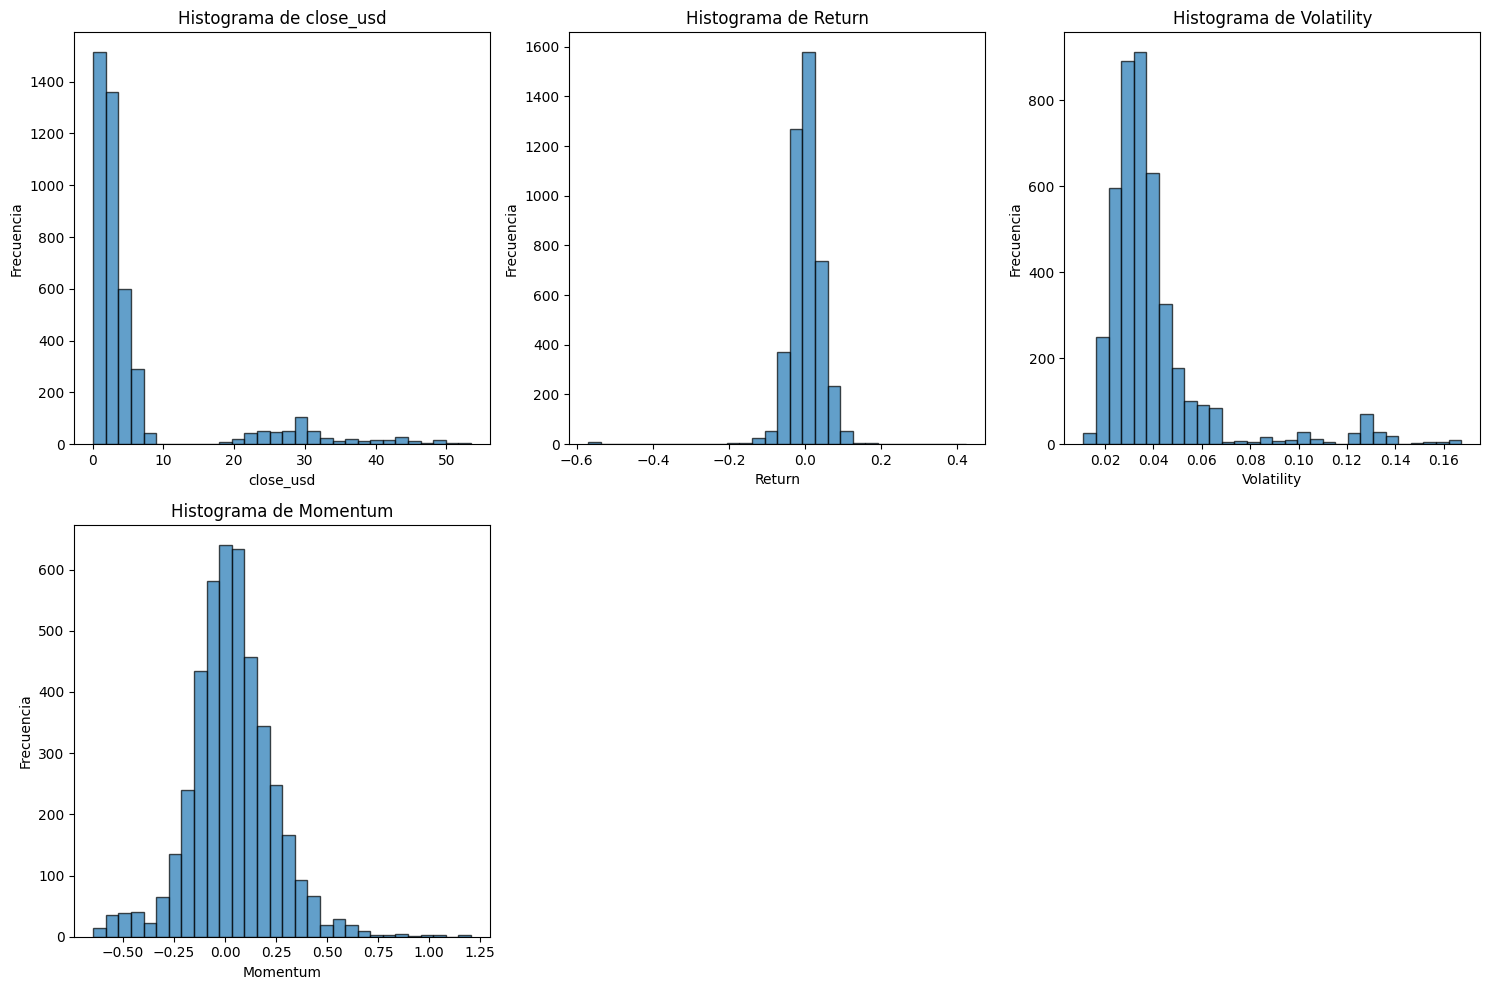

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))

for i, col in enumerate(cols_numericas, 1):
    plt.subplot(2, 3, i)
    plt.hist(df_modelo_long[col], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

##Observamos los graficos de Boxplots

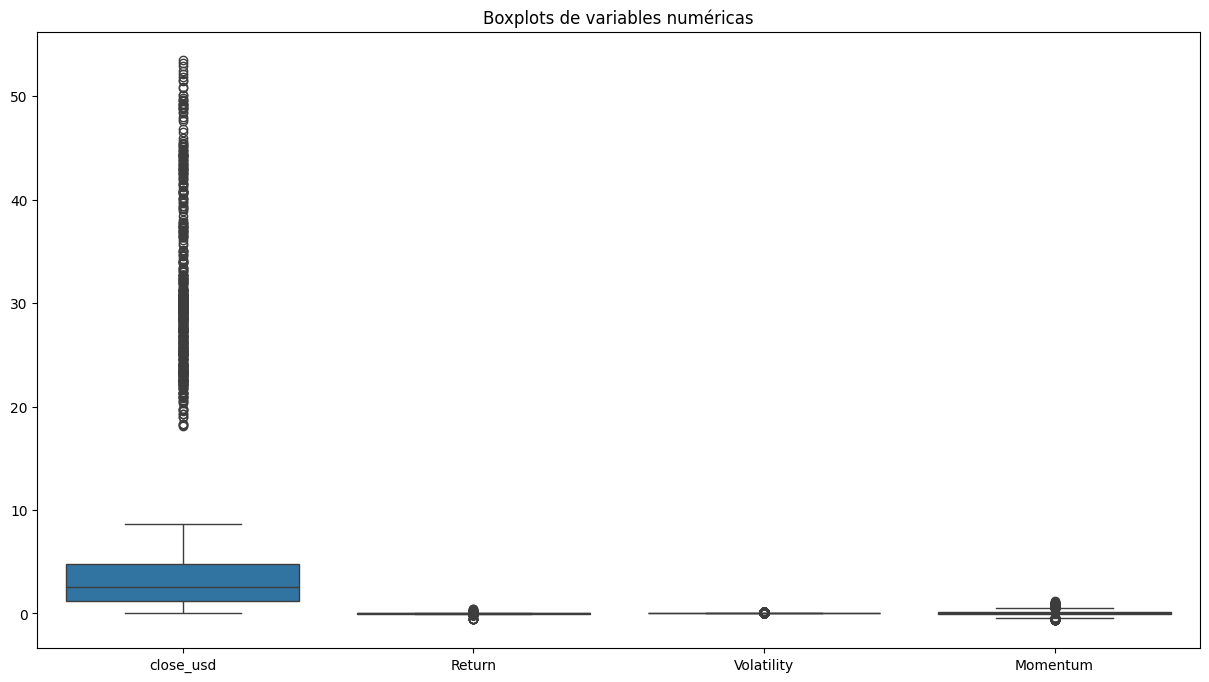

In [ ]:
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(data=df_modelo_long[cols_numericas])
plt.title('Boxplots de variables numéricas')
plt.show()

##Matriz de correlación

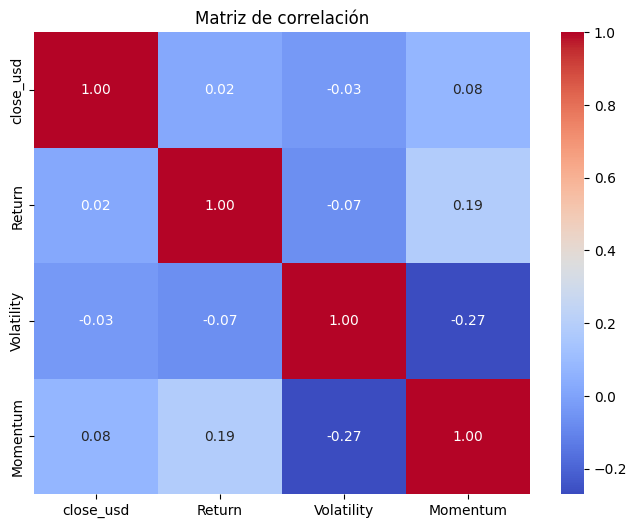

In [ ]:
corr = df_modelo_long[cols_numericas].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

##Manejo de outliers

In [ ]:
import numpy as np

# Calcular z-score absoluto
z_scores = np.abs((df_modelo_long[cols_numericas] - df_modelo_long[cols_numericas].mean()) / df_modelo_long[cols_numericas].std())

# Filtrar filas sin outliers según z-score (umbral 3)
filtro_z = (z_scores < 3).all(axis=1)
df_sin_outliers_z = df_modelo_long[filtro_z]

print(f"Registros originales: {len(df_modelo_long)}")
print(f"Registros sin outliers (z-score < 3): {len(df_sin_outliers_z)}")


Registros originales: 4352
Registros sin outliers (z-score < 3): 4006


In [ ]:
#Calcular rango intercuartílico (IQR) y detectar outliers
Q1 = df_modelo_long[cols_numericas].quantile(0.25)
Q3 = df_modelo_long[cols_numericas].quantile(0.75)
IQR = Q3 - Q1

# Condición para valores dentro del rango aceptable
filtro_iqr = ~((df_modelo_long[cols_numericas] < (Q1 - 1.5 * IQR)) |
               (df_modelo_long[cols_numericas] > (Q3 + 1.5 * IQR))).any(axis=1)

df_sin_outliers_iqr = df_modelo_long[filtro_iqr]

print(f"Registros sin outliers (IQR): {len(df_sin_outliers_iqr)}")


Registros sin outliers (IQR): 3379


In [ ]:
# Combinamos ambos filtros
filtro_comb = filtro_z & filtro_iqr
df_sin_outliers_comb = df_modelo_long[filtro_comb]

print(f"📉 Registros sin outliers (z-score + IQR): {len(df_sin_outliers_comb)}")

📉 Registros sin outliers (z-score + IQR): 3379


##Comparación de Ouliers Original - ZScore & IQR

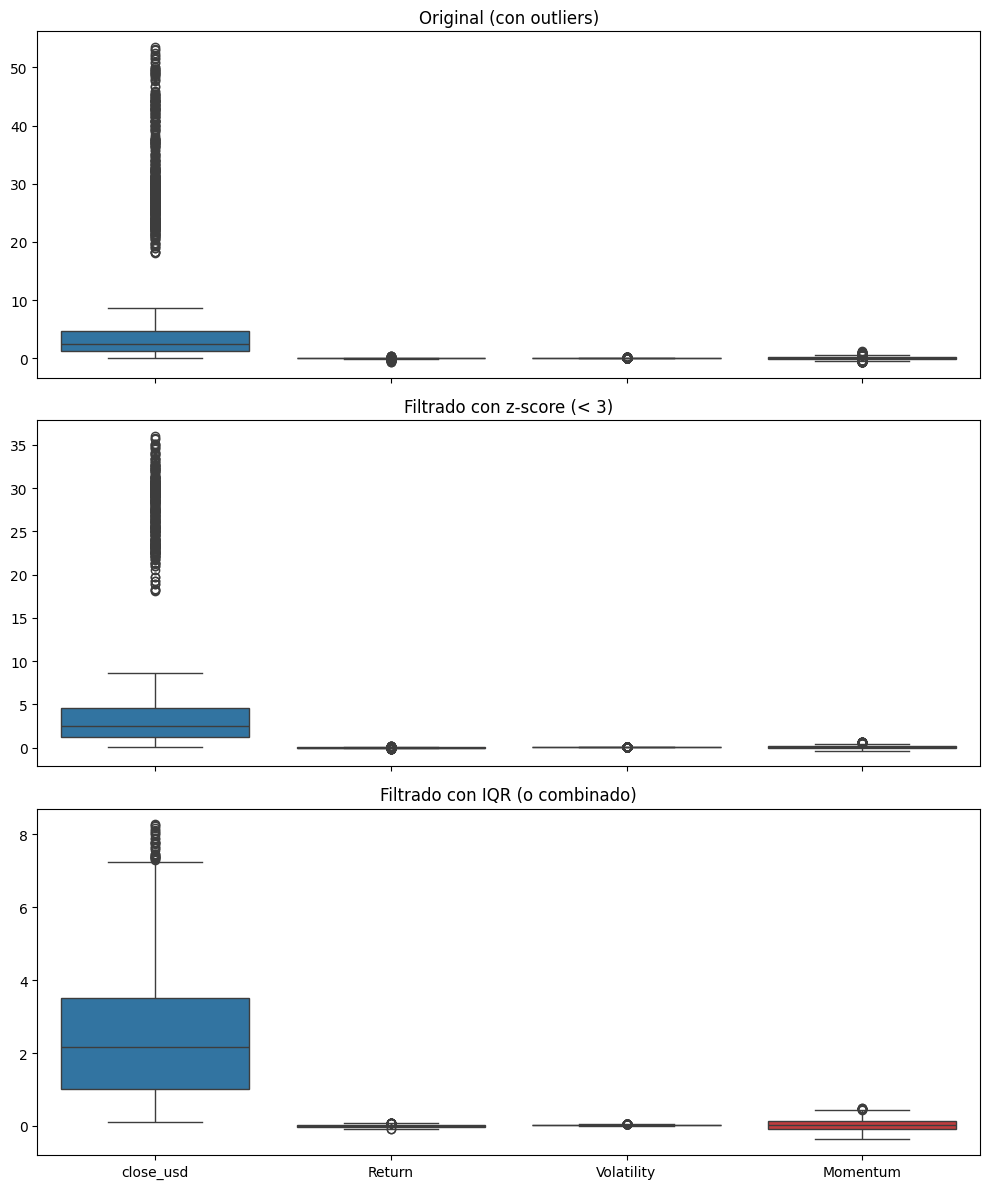

In [ ]:
#Comparamos bloxplots

fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Original
sns.boxplot(data=df_modelo_long[cols_numericas], ax=axes[0])
axes[0].set_title("Original (con outliers)")

# Z-score
sns.boxplot(data=df_modelo_long[filtro_z][cols_numericas], ax=axes[1])
axes[1].set_title("Filtrado con z-score (< 3)")

# IQR (o combinado, da igual en tu caso)
sns.boxplot(data=df_modelo_long[filtro_iqr][cols_numericas], ax=axes[2])
axes[2].set_title("Filtrado con IQR (o combinado)")

plt.tight_layout()
plt.show()

## Matriz de dispersión antes y después del tratamiento de outliers

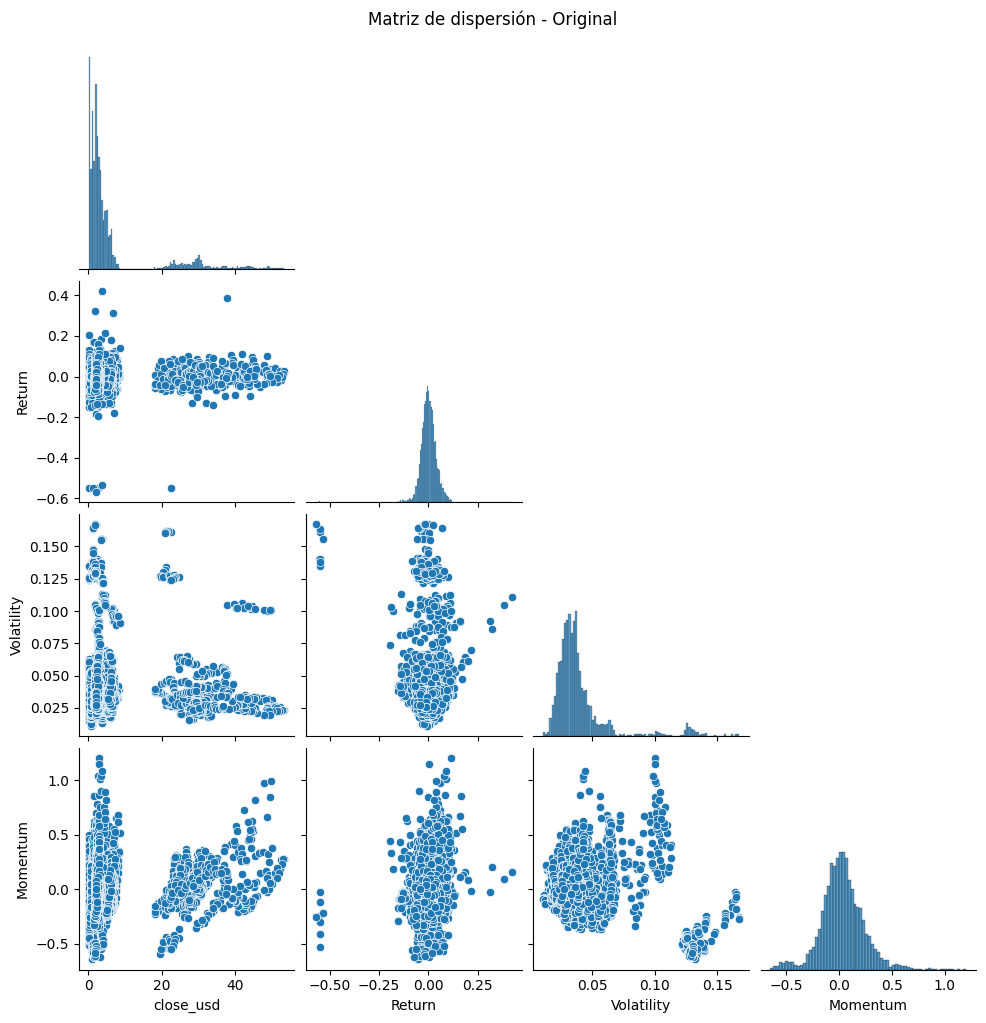

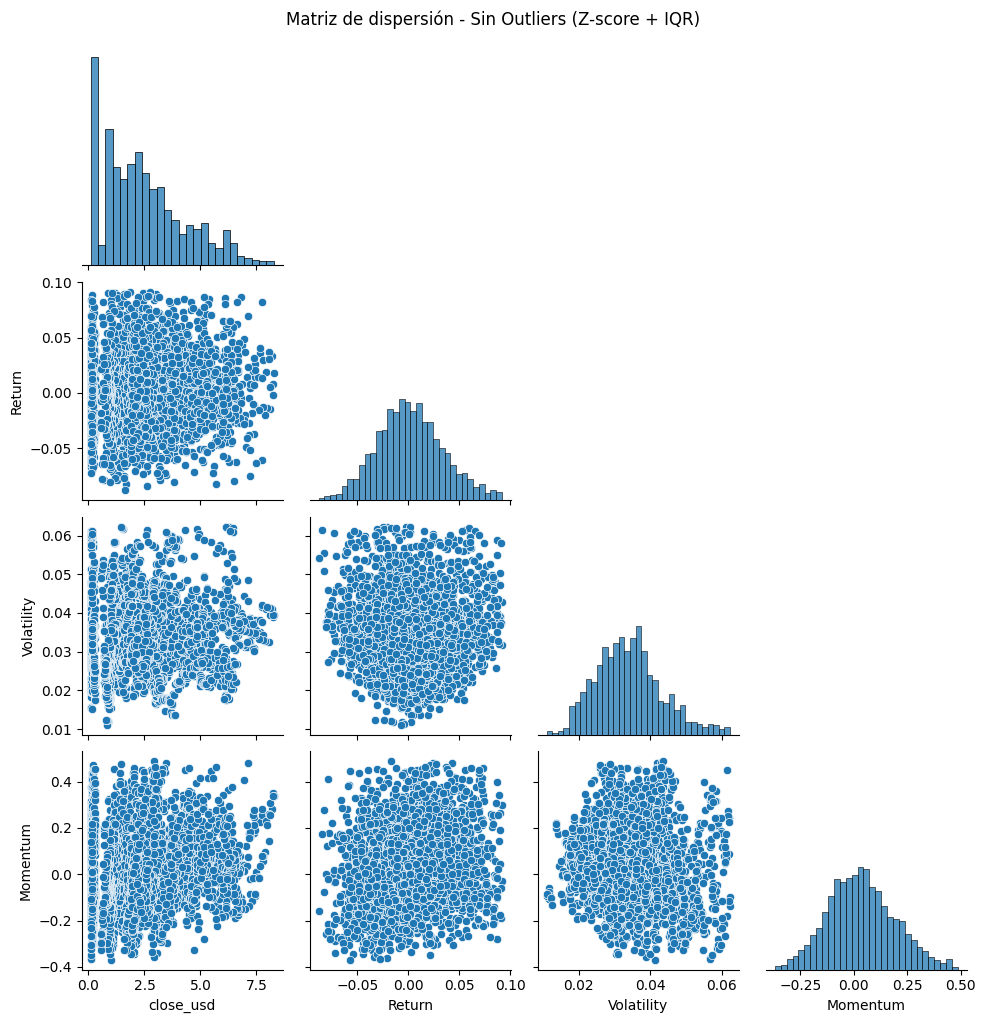

In [ ]:
# Pairplot antes
sns.pairplot(df_modelo_long[cols_numericas], corner=True)
plt.suptitle("Matriz de dispersión - Original", y=1.02)
plt.show()

# Pairplot después
sns.pairplot(df_sin_outliers_comb[cols_numericas], corner=True)
plt.suptitle("Matriz de dispersión - Sin Outliers (Z-score + IQR)", y=1.02)
plt.show()

In [ ]:
# Comparación general
original = df_modelo_long.shape[0]
limpio = df_sin_outliers_iqr.shape[0]
eliminados = original - limpio
porcentaje_eliminado = eliminados / original * 100

print("📊 Comparación del dataset antes y después de limpiar outliers (IQR):")
print(f"- Registros originales: {original}")
print(f"- Registros luego de limpieza: {limpio}")
print(f"- Registros eliminados: {eliminados} ({porcentaje_eliminado:.2f}%)")

📊 Comparación del dataset antes y después de limpiar outliers (IQR):
- Registros originales: 4352
- Registros luego de limpieza: 3379
- Registros eliminados: 973 (22.36%)


##Verificamos si hay registros redundantes
Nos aseguramos de que no haya observaciones redundantes que puedan sesgar el análisis o el entrenamiento del modelo.

In [ ]:
df_limpio= df_sin_outliers_iqr
metricas = ['Return', 'Volatility', 'Momentum']
duplicados_metricas = df_limpio.duplicated(subset=metricas)
print(f"Duplicados exactos en métricas: {duplicados_metricas.sum()}")

Duplicados exactos en métricas: 0


#Modelo de Cluster

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

# VERSION 1: Solo métricas financieras

df_modelo_v1 = df_sin_outliers_iqr.copy()
features_v1 = ['Return', 'Volatility', 'Momentum']

# Normalizamos: Usamos StandardScaler para escalar cada variable a media 0 y desviación estándar 1.
scaler_v1 = StandardScaler()
X_v1 = scaler_v1.fit_transform(df_modelo_v1[features_v1])

# Entrenamos el modelo K-Means inicialmente con k=3 clusters
k_means_v1 = KMeans(n_clusters=3, random_state=42, n_init= 'auto')
df_modelo_v1['Cluster'] = k_means_v1.fit_predict(X_v1)

##Analizamos resultados en Boxplot para cada métrica

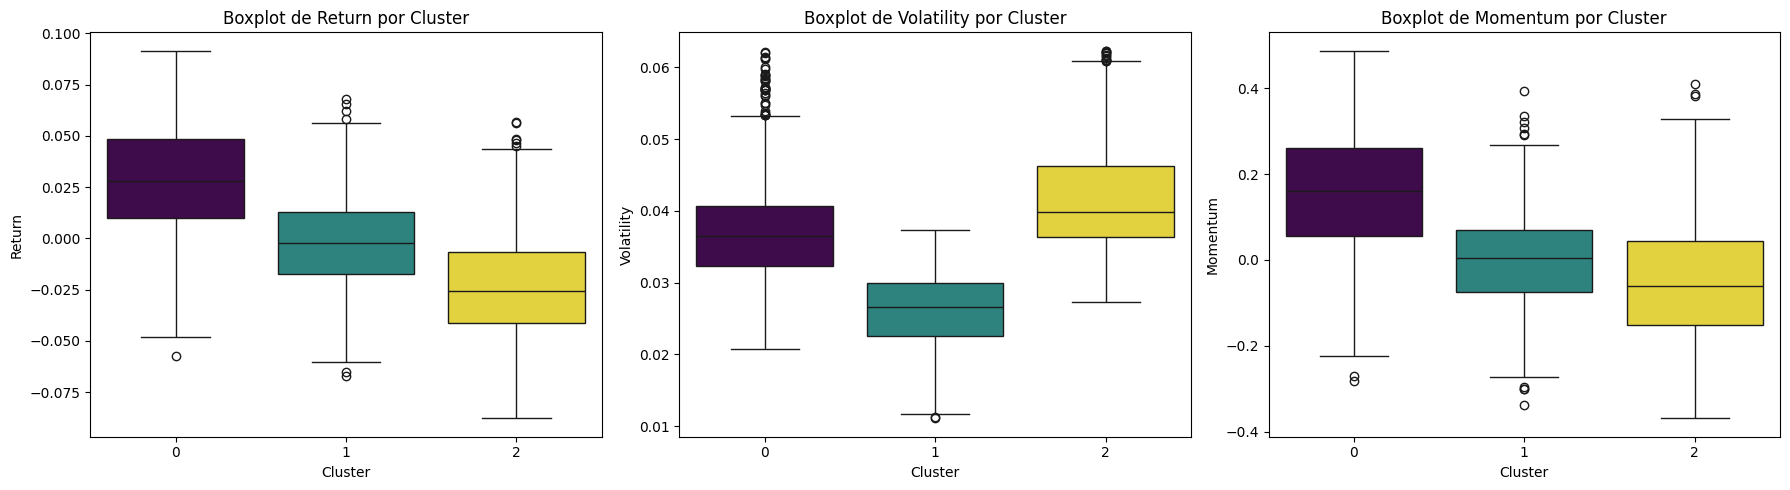

In [ ]:
fig, axes = plt.subplots(1, len (features_v1), figsize=(18, 5))

for i, feature in enumerate(features_v1):
    sns.boxplot(x='Cluster', y=feature, data=df_modelo_v1, ax=axes[i], hue='Cluster', palette='viridis', legend=False)
    axes[i].set_title(f'Boxplot de {feature} por Cluster')

plt.tight_layout()
plt.show()

##Evaluamos multiples K

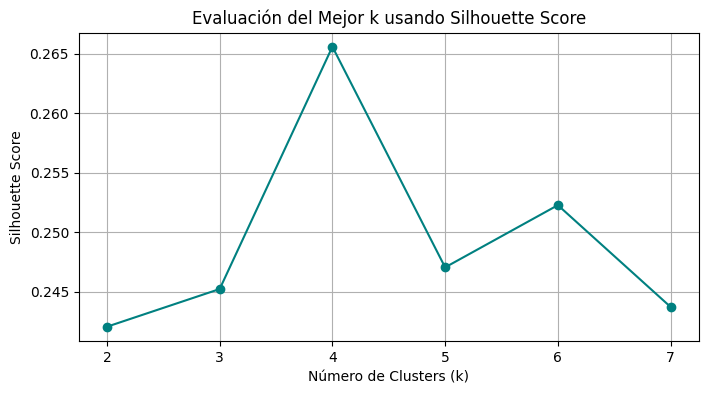

In [ ]:
K = range(2, 8)
fits = []
scores = []

for k in K:
    model = KMeans(n_clusters = k, random_state = 42, n_init='auto')
    labels = model.fit_predict(X_v1)
    fits.append(model)

    score= silhouette_score(X_v1, model.labels_, metric='euclidean')
    scores.append(score)

# Graficamos el resultado

plt.figure(figsize=(8, 4))
plt.plot(K, scores, marker='o', linestyle='-', color='teal')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Evaluación del Mejor k usando Silhouette Score')
plt.grid(True)
plt.show()

## Encontramos el K= 4 como óptimo y mostramos los resultados en BoxPlot

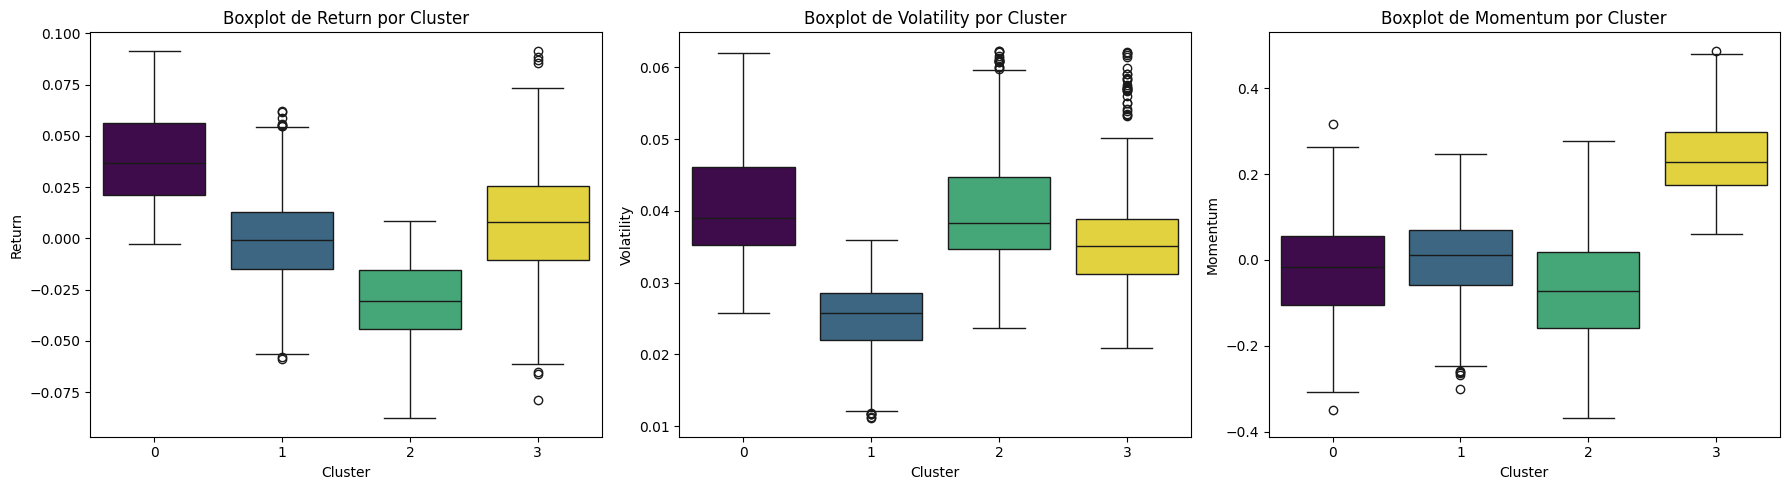

In [ ]:
# Entrenamos el modelo K-Means con el K óptimo
k_means_v1_optimo = KMeans(n_clusters=4, random_state=42, n_init= 'auto')
df_modelo_v1['Cluster'] = k_means_v1_optimo.fit_predict(X_v1)

#Boxplot
fig, axes = plt.subplots(1, len (features_v1), figsize=(18, 5))

for i, feature in enumerate(features_v1):
    sns.boxplot(x='Cluster', y=feature, data=df_modelo_v1, ax=axes[i], hue='Cluster', palette='viridis', legend=False)
    axes[i].set_title(f'Boxplot de {feature} por Cluster')

plt.tight_layout()
plt.show()

### 🧩 Perfiles por Cluster (Resumen cualitativo)  k = 4

| Cluster | Retorno | Volatilidad | Momentum | Perfil general                                  |
|---------|---------|-------------|----------|-------------------------------------------------|
| 0       | Alto    | Alta        | Bajo     | Rentable pero con riesgo y sin momentum        |
| 1       | Bajo    | Baja        | Medio    | Conservador, baja volatilidad                  |
| 2       | Bajo    | Media/Alta  | Bajo     | Débil performance y sin tendencia              |
| 3       | Medio   | Media       | Alto     | Potencial alcista, rendimiento estable         |

##Mostramos valores de centroides y Cluster destacado

In [ ]:
# Obtenemos los centroides (están en escala estandarizada)
centroides_v1 = k_means_v1_optimo.cluster_centers_

# Los llevamos a su escala original
centroides_v1_original = scaler_v1.inverse_transform(centroides_v1)

# Creamos DataFrame
df_centroides_v1 = pd.DataFrame(centroides_v1_original, columns=features_v1)
df_centroides_v1['Cluster'] = df_centroides_v1.index
df_centroides_v1.set_index('Cluster', inplace=True)

# Mostramos para verificar
df_centroides_v1


,Return,Volatility,Momentum
Cluster,,,
0,0.039686,0.040841,-0.024415
1,-0.000013,0.025284,0.005259
2,-0.031096,0.039791,-0.072846
3,0.007937,0.035546,0.239534


Este cuadro me muestra en las filas los cluster y las columnas bajo cada cluster, un "centroide" que es el promedio de las caraterísticas para los puntos que pertencen a ese cluster.
Los centroides nos ayudan a entender las diferencias en el comportamiento de los grupos. Esto es un aspecto clave para aplicar técnicas de análisis más profundas, como la clasificación o la predicción.
Lo que podemos observar es que cada cluster tiene características unicas. POr jemplo el CLUSTER 3 parecet tener un puntaje fuerte en la caracteristica MOMENTUM lo que lo hace de interes para el analisis.

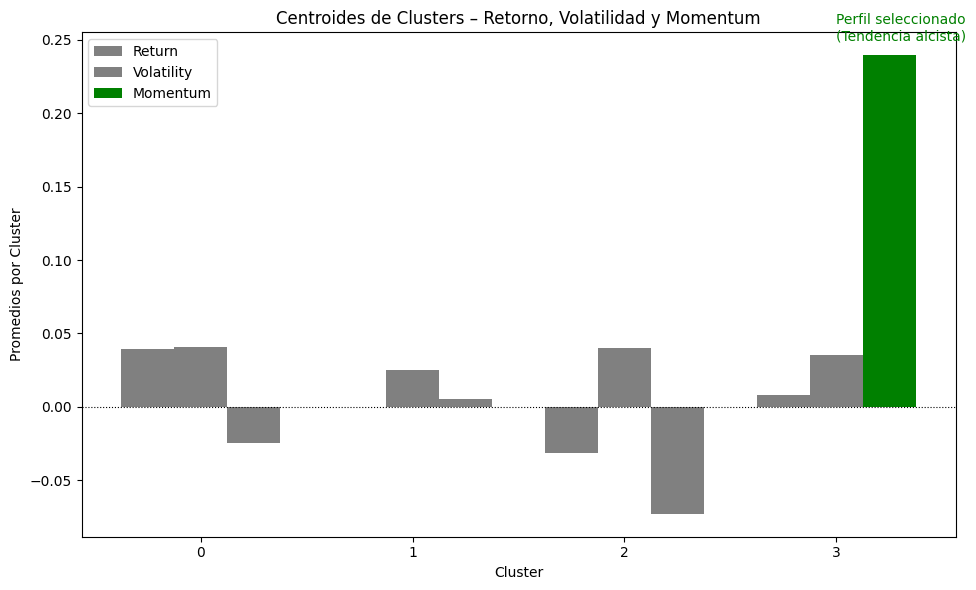

El cluster 3 destaca por su retorno positivo, volatilidad media y momentum alto, lo que indica una clara tendencia alcista y un perfil ideal para análisis de acciones.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Métrica que querés destacar
highlight_metric = 'Momentum'
highlight_cluster = 3

# Extraer nombres de métricas (columnas)
metrics = df_centroides_v1.columns.tolist()
clusters = df_centroides_v1.index.tolist()

# Posiciones para las barras
x = np.arange(len(clusters))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

bars = []
default_color = 'gray'
highlight_color = 'green'

for i, metric in enumerate(metrics):
    values = df_centroides_v1[metric].values
    # Color solo en la métrica y cluster seleccionado
    color = [
        highlight_color if (metric == highlight_metric and idx == highlight_cluster) else default_color
        for idx in clusters
    ]
    bar = ax.bar(x + i * width, values, width, label=metric, color=color)
    bars.append(bar)

# Etiquetas y estética
ax.set_xlabel('Cluster')
ax.set_ylabel('Promedios por Cluster')
ax.set_title('Centroides de Clusters – Retorno, Volatilidad y Momentum')
ax.set_xticks(x + width)
ax.set_xticklabels(clusters)

# Leyenda con color verde para la métrica destacada
legend_elements = [
    Patch(facecolor=highlight_color if metric == highlight_metric else default_color, label=metric)
    for metric in metrics
]
ax.legend(handles=legend_elements)

# Anotación opcional
highlight_value = df_centroides_v1.loc[highlight_cluster, highlight_metric]
ax.text(highlight_cluster + width,
        highlight_value + 0.01,
        'Perfil seleccionado\n(Tendencia alcista)',
        color=highlight_color)

# Línea horizontal en 0 para referencia
ax.axhline(0, color='black', linestyle='dotted', linewidth=0.8)
plt.tight_layout()
plt.show()

# --- Explicación de la elección ---
print(
    "El cluster 3 destaca por su retorno positivo, volatilidad media y momentum alto, "
    "lo que indica una clara tendencia alcista y un perfil ideal para análisis de acciones."
)

##Elección de Acción candidata para aplicar segundo modelo (ARIMA)

Ordenamos el resumen para priorizar acciones con menor volatilidad (más estables), luego con mayor momentum (tendencia positiva fuerte), y finalmente con mayor retorno (mejor desempeño), porque para análisis de series temporales como ARIMA, la estabilidad y la tendencia son más relevantes que solo un retorno alto, que puede ser volátil o errático.

In [ ]:
# 1. Filtramos solo las acciones del Cluster 3
cluster_3 = df_modelo_v1[df_modelo_v1['Cluster'] == 3]

# 2. Agrupamos por Ticker y calcular el promedio de Return, Momentum y Volatility
resumen = cluster_3.groupby('Ticker')[['Return', 'Momentum', 'Volatility']].mean()

# 3. Ordenamos segun criterio establecido
resumen_ordenado = resumen.sort_values(by=['Volatility', 'Momentum', 'Return'], ascending=[True, False, False])

# 4. Mostramo las top 5 acciones
top5 = resumen_ordenado.head(5)
print(top5)

print("\nAcción candidata elegida: PAMP_USD")

             Return  Momentum  Volatility
Ticker                                   
PAMP_USD   0.011567  0.213091    0.033090
COME_USD   0.010167  0.266490    0.034757
EDN_USD    0.008103  0.253962    0.034998
TGSU2_USD  0.004555  0.214354    0.035186
ALUA_USD   0.011466  0.204029    0.035507

Acción candidata elegida: PAMP_USD


In [ ]:
df_modelo_v1

,Date,D,Ticker,close_usd,Return,Volatility,Momentum,Cluster
586,2023-03-06,22,GGAL_USD,2.239057,0.023813,0.026423,-0.040419,1
587,2023-03-07,23,GGAL_USD,2.171286,-0.030268,0.027151,-0.068184,1
588,2023-03-08,24,GGAL_USD,2.252494,0.037401,0.025891,0.021566,1
589,2023-03-09,25,GGAL_USD,2.218245,-0.015205,0.026142,0.005505,1
590,2023-03-10,26,GGAL_USD,2.108476,-0.049485,0.028134,-0.056657,2
...,...,...,...,...,...,...,...,...
4515,2025-05-26,561,TECO_USD,2.151956,-0.004026,0.033219,-0.042895,1
4516,2025-05-27,562,TECO_USD,2.125073,-0.012492,0.029317,0.017491,1
4517,2025-05-28,563,TECO_USD,2.101174,-0.011246,0.025948,0.070407,1
4518,2025-05-29,564,TECO_USD,2.077129,-0.011444,0.025838,0.036795,1


In [ ]:
df_modelo_v1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3379 entries, 586 to 4519
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        3379 non-null   datetime64[ns]
 1   D           3379 non-null   int64         
 2   Ticker      3379 non-null   object        
 3   close_usd   3379 non-null   float64       
 4   Return      3379 non-null   float64       
 5   Volatility  3379 non-null   float64       
 6   Momentum    3379 non-null   float64       
 7   Cluster     3379 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(1), object(1)
memory usage: 224.4+ KB


In [ ]:
#df_modelo_v1.head()

In [ ]:
#df_modelo_v1.tail()

# Utilización de Series Temporales (ARIMA)

In [ ]:

print("MODELO ARIMA PARA INDICE_USD")
print("=" * 50)

# 1. CARGAR Y PREPARAR DATOS
#df = activos_dolarizados.copy()
df = df_modelo_v1.copy()

# Serie temporal
#serie = df['Indice_USD']

# Filtrar por acción candidata y ordenamos por fecha
serie = df[df['Ticker'] == 'PAMP_USD'].sort_values('Date').copy()

# Establecer la columna 'Date' como índice temporal
serie.set_index('Date', inplace=True)

# Seleccionar solo la serie de valores en USD
serie = serie['close_usd']

print(f"Período de datos: {serie.index.min().strftime('%d/%m/%Y')} a {serie.index.max().strftime('%d/%m/%Y')}")
print(f"Número de observaciones: {len(serie)}")
print(f"Frecuencia: {pd.infer_freq(serie.index) or 'Irregular'}")
print("-" * 50)

# Diferencias (para evaluar estacionariedad)
diferencias = serie.diff().dropna()

# 3. PRUEBA DE ESTACIONARIEDAD (Augmented Dickey-Fuller)
print("3. PRUEBA DE ESTACIONARIEDAD:")
print("H0: La serie NO es estacionaria")
print("H1: La serie ES estacionaria")
print()

# Serie original
resultado_adf = adfuller(serie)
print("Serie Original:")
print(f"Estadístico ADF: {resultado_adf[0]:.4f}")
print(f"p-valor: {resultado_adf[1]:.4f}")
print(f"Valores críticos: {resultado_adf[4]}")
print(f"¿Es estacionaria? {'SÍ' if resultado_adf[1] < 0.05 else 'NO'}")
print()

# Primera diferencia si es necesario
if resultado_adf[1] >= 0.05:
    print("Serie Diferenciada (d=1):")
    resultado_adf_diff = adfuller(diferencias)
    print(f"Estadístico ADF: {resultado_adf_diff[0]:.4f}")
    print(f"p-valor: {resultado_adf_diff[1]:.4f}")
    print(f"¿Es estacionaria? {'SÍ' if resultado_adf_diff[1] < 0.05 else 'NO'}")
    print()

print("-" * 50)



MODELO ARIMA PARA INDICE_USD
Período de datos: 06/03/2023 a 30/05/2025
Número de observaciones: 500
Frecuencia: Irregular
--------------------------------------------------
3. PRUEBA DE ESTACIONARIEDAD:
H0: La serie NO es estacionaria
H1: La serie ES estacionaria

Serie Original:
Estadístico ADF: -2.3138
p-valor: 0.1676
Valores críticos: {'1%': np.float64(-3.4435228622952065), '5%': np.float64(-2.867349510566146), '10%': np.float64(-2.569864247011056)}
¿Es estacionaria? NO

Serie Diferenciada (d=1):
Estadístico ADF: -23.6283
p-valor: 0.0000
¿Es estacionaria? SÍ

--------------------------------------------------


5. SELECCIÓN DE PARÁMETROS ARIMA:
Probando diferentes combinaciones (p,d,q)...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Top 5 modelos por AIC:
ARIMA(3, 0, 2): AIC = -716.18
ARIMA(3, 1, 3): AIC = -713.55
ARIMA(1, 1, 0): AIC = -712.48
ARIMA(0, 1, 1): AIC = -712.45
ARIMA(1, 0, 0): AIC = -712.27

Mejor modelo: ARIMA(3, 0, 2) con AIC = -716.18
--------------------------------------------------
6. AJUSTE DEL MODELO ARIMA:


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


                               SARIMAX Results                                
Dep. Variable:              close_usd   No. Observations:                  500
Model:                 ARIMA(3, 0, 2)   Log Likelihood                 365.090
Date:                Thu, 12 Jun 2025   AIC                           -716.180
Time:                        00:49:47   BIC                           -686.678
Sample:                             0   HQIC                          -704.604
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1798      0.271     11.717      0.000       2.648       3.712
ar.L1         -0.3478      0.038     -9.100      0.000      -0.423      -0.273
ar.L2          0.3588      0.030     11.875      0.0

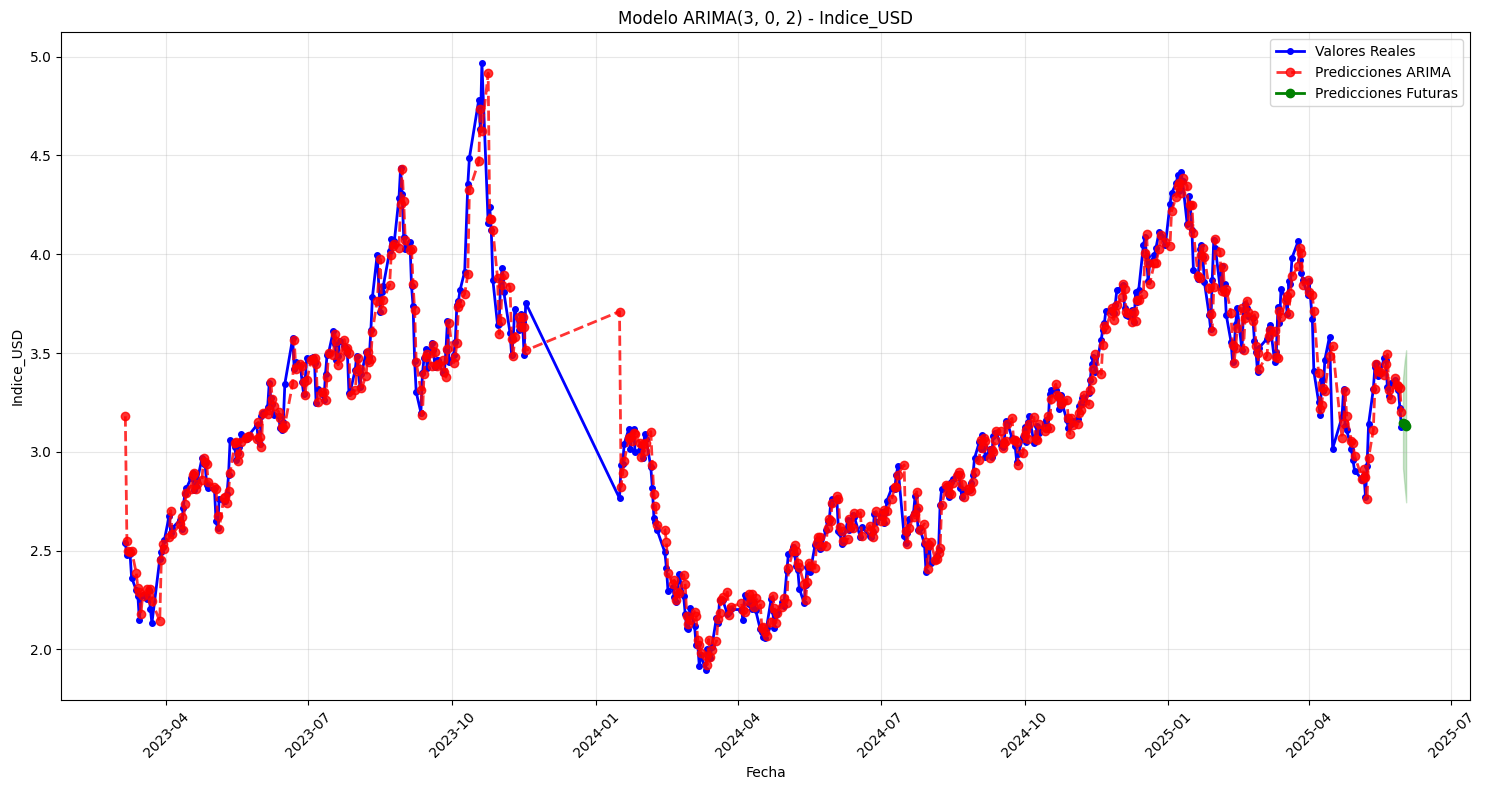


ANÁLISIS COMPLETADO!
Modelo final: ARIMA(3, 0, 2)
El modelo captura 96.1% de la variabilidad de la serie


In [ ]:
# 4. ANÁLISIS ACF Y PACF PARA DETERMINAR PARÁMETROS
"""
print("4. GRÁFICOS ACF Y PACF PARA IDENTIFICAR PARÁMETROS:")

fig, axes = plt.subplots(2, 2, figsize=(15, 8))

# ACF y PACF de la serie original
plot_acf(serie, ax=axes[0,0], lags=min(10, len(serie)//2-1), title='ACF - Serie Original')
plot_pacf(serie, ax=axes[0,1], lags=min(10, len(serie)//2-1), title='PACF - Serie Original')

# ACF y PACF de la serie diferenciada (si corresponde)
if len(diferencias) > 5:
    plot_acf(diferencias, ax=axes[1,0], lags=min(8, len(diferencias)//2-1), title='ACF - Primera Diferencia')
    plot_pacf(diferencias, ax=axes[1,1], lags=min(8, len(diferencias)//2-1), title='PACF - Primera Diferencia')

plt.tight_layout()
plt.show()
"""

# 5. SELECCIÓN AUTOMÁTICA DE PARÁMETROS ARIMA
print("5. SELECCIÓN DE PARÁMETROS ARIMA:")
print("Probando diferentes combinaciones (p,d,q)...")

# Función para evaluar modelos ARIMA
def evaluar_arima(serie, orden):
    try:
        modelo = ARIMA(serie, order=orden)
        modelo_fit = modelo.fit()
        return modelo_fit.aic
    except:
        return np.inf

# Buscar mejores parámetros
mejor_aic = np.inf
mejor_orden = None
resultados = []

# Rango de parámetros (limitado por el tamaño de muestra)
max_p = min(3, len(serie)//3)
max_d = 2
max_q = min(3, len(serie)//3)

for p in range(max_p + 1):
    for d in range(max_d + 1):
        for q in range(max_q + 1):
            if p + q > 0:  # Al menos un parámetro debe ser > 0
                aic = evaluar_arima(serie, (p, d, q))
                resultados.append([(p, d, q), aic])
                if aic < mejor_aic:
                    mejor_aic = aic
                    mejor_orden = (p, d, q)


# Mostrar mejores modelos
resultados.sort(key=lambda x: x[1])
print("Top 5 modelos por AIC:")
for i in range(min(5, len(resultados))):
    if resultados[i][1] != np.inf:
        print(f"ARIMA{resultados[i][0]}: AIC = {resultados[i][1]:.2f}")

print(f"\nMejor modelo: ARIMA{mejor_orden} con AIC = {mejor_aic:.2f}")
print("-" * 50)


# 6. AJUSTAR EL MEJOR MODELO
print("6. AJUSTE DEL MODELO ARIMA:")
modelo_final = ARIMA(serie, order=mejor_orden)
modelo_ajustado = modelo_final.fit()

print(modelo_ajustado.summary())
print("-" * 50)

# 7. DIAGNÓSTICO DE RESIDUOS
"""
print("7. DIAGNÓSTICO DE RESIDUOS:")
residuos = modelo_ajustado.resid

# Gráficos de diagnóstico
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Residuos vs tiempo
axes[0,0].plot(residuos.index, residuos, 'bo-', alpha=0.7)
axes[0,0].axhline(y=0, color='r', linestyle='--')
axes[0,0].set_title('Residuos vs Tiempo')
axes[0,0].set_xlabel('Fecha')
axes[0,0].set_ylabel('Residuos')
axes[0,0].grid(True, alpha=0.3)

# Histograma de residuos
axes[0,1].hist(residuos, bins=6, alpha=0.7, color='orange', edgecolor='black')
axes[0,1].set_title('Distribución de Residuos')
axes[0,1].set_xlabel('Residuos')
axes[0,1].set_ylabel('Frecuencia')
axes[0,1].grid(True, alpha=0.3)

# Q-Q plot
from scipy import stats
stats.probplot(residuos, dist="norm", plot=axes[1,0])
axes[1,0].set_title('Q-Q Plot de Residuos')
axes[1,0].grid(True, alpha=0.3)

# ACF de residuos
plot_acf(residuos, ax=axes[1,1], lags=min(8, len(residuos)//2-1), title='ACF de Residuos')

plt.tight_layout()
plt.show()

# Test de Ljung-Box para autocorrelación en residuos
ljung_box = acorr_ljungbox(residuos, lags=min(5, len(residuos)//3), return_df=True)
print("Test de Ljung-Box (autocorrelación en residuos):")
print("H0: No hay autocorrelación en los residuos")
print(ljung_box)
print()

# Estadísticas de residuos
print("Estadísticas de residuos:")
print(f"Media: {residuos.mean():.4f}")
print(f"Desviación estándar: {residuos.std():.4f}")
print(f"Normalidad (Jarque-Bera p-valor): {stats.jarque_bera(residuos)[1]:.4f}")
print("-" * 50)
"""

# 8. PREDICCIONES
print("8. PREDICCIONES:")
# Predicciones in-sample
predicciones_insample = modelo_ajustado.fittedvalues

# Métricas de ajuste
mse = mean_squared_error(serie, predicciones_insample)
rmse = np.sqrt(mse)
mae = mean_absolute_error(serie, predicciones_insample)

print(f"RMSE (in-sample): {rmse:.4f}")
print(f"MAE (in-sample): {mae:.4f}")
print(f"MAPE (in-sample): {(np.abs((serie - predicciones_insample) / serie).mean() * 100):.2f}%")

# Predicciones out-of-sample (próximos períodos)
n_forecast = 3
forecast = modelo_ajustado.forecast(steps=n_forecast)
conf_int = modelo_ajustado.get_forecast(steps=n_forecast).conf_int()

print(f"\nPredicciones para los próximos {n_forecast} períodos:")
for i in range(n_forecast):
    print(f"Período {i+1}: {forecast.iloc[i]:.4f} [{conf_int.iloc[i,0]:.4f}, {conf_int.iloc[i,1]:.4f}]")

# Gráfico final: Valores reales vs predicciones
plt.figure(figsize=(15, 8))
plt.plot(serie.index, serie, 'bo-', label='Valores Reales', linewidth=2, markersize=4)
plt.plot(serie.index, predicciones_insample, 'ro--', label='Predicciones ARIMA', linewidth=2, alpha=0.8)

# Agregar predicciones futuras
fechas_futuras = pd.date_range(start=serie.index[-1] + pd.Timedelta(days=1), periods=n_forecast, freq='D')
plt.plot(fechas_futuras, forecast, 'go-', label='Predicciones Futuras', linewidth=2, markersize=6)
plt.fill_between(fechas_futuras, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2, color='green')

plt.title(f'Modelo ARIMA{mejor_orden} - Indice_USD')
plt.xlabel('Fecha')
plt.ylabel('Indice_USD')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nANÁLISIS COMPLETADO!")
print(f"Modelo final: ARIMA{mejor_orden}")
print(f"El modelo captura {(1 - mse/np.var(serie))*100:.1f}% de la variabilidad de la serie")